<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/phishingemails_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook
**Follow the steps:-**
1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d subhajournal/phishingemails

 78% 14.0M/18.0M [00:00<00:00, 32.4MB/s]
100% 18.0M/18.0M [00:00<00:00, 36.8MB/s]


In [5]:
import zipfile
zip = zipfile.ZipFile("/content/phishingemails.zip",'r')
zip.extractall("/content")
zip.close()

In [7]:
df=pd.read_csv('Phishing_Email.csv')

In [ ]:
df.shape

(18650, 3)

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df=df.drop(columns='Unnamed: 0')

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.isnull().sum()

Email Text    16
Email Type     0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Email Text    0
Email Type    0
dtype: int64

In [ ]:
df['Email Type'].value_counts()

Safe Email        11322
Phishing Email     7312
Name: Email Type, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


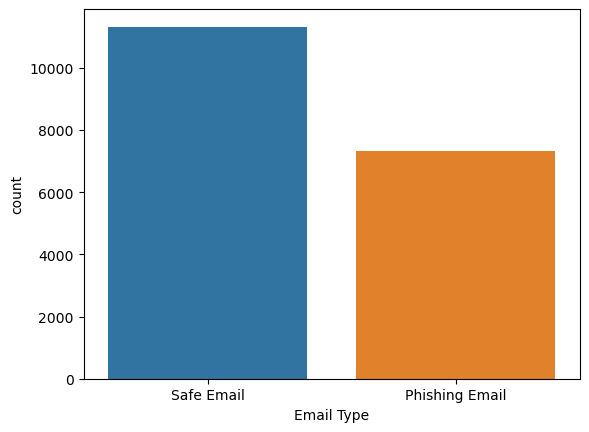

In [ ]:
sns.countplot(x=df['Email Type'])
plt.show()

## Text Preprocessing Steps:-

1. Remove html tags
2. Remove special characters
3. Converting every thing to lower case
4. Removeing stop words
5. Stemming

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [ ]:
len(df['Email Text'])

18634

In [ ]:
def extract_alphabetical(df, column_name):
    # Ensure that the specified column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Use regular expression to extract alphabetical characters from the text column
    alpha_pattern = r'[a-zA-Z]+'
    extracted_text = df[column_name].str.findall(alpha_pattern)

    # Join the extracted lists of alphabetical characters into a single string
    # and create a new Series
    return extracted_text.apply(' '.join)


extracted_alphabets = extract_alphabetical(df, 'Email Text')

df['Email Text'] = extracted_alphabets

In [ ]:
df.head()

,Email Text,Email Type
0,re disc uniformitarianism re sex lang dick hud...,Safe Email
1,the other side of galicismos galicismo is a sp...,Safe Email
2,re equistar deal tickets are you still availab...,Safe Email
3,Hello I am your hot lil horny toy I am the one...,Phishing Email
4,software at incredibly low prices lower draper...,Phishing Email


In [ ]:
def lowerStr(text):
    return text.lower()

In [ ]:
df['Email Text']=df['Email Text'].apply(lowerStr)

In [ ]:
len(df['Email Text'])

18634

In [ ]:

def remove_stopwords(df, column_name):
    # Ensure that the specified column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    stop_words = set(stopwords.words('english'))

    # Function to remove stopwords from a text
    def remove_stopwords_from_text(text):
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])

    # Apply the function to the text column and create a new Series
    return df[column_name].apply(remove_stopwords_from_text)

# Example usage:
# Assuming you have a DataFrame named 'df' with a text column named 'Email Text'
# Call the function to remove stopwords from the 'Email Text' column
text_without_stopwords = remove_stopwords(df, 'Email Text')

# Add the new Series to the original DataFrame (optional)
df['Email Text'] = text_without_stopwords

In [ ]:
df['Email Text'].head()

0    disc uniformitarianism sex lang dick hudson ob...
1    side galicismos galicismo spanish term names i...
2    equistar deal tickets still available assist r...
3    hello hot lil horny toy one dream open minded ...
4    software incredibly low prices lower drapery s...
Name: Email Text, dtype: object

In [ ]:
len(df['Email Text'])

18634

In [ ]:

def apply_stemming(df, column_name):
    # Ensure that the specified column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Initialize the Porter Stemmer from NLTK
    ps = PorterStemmer()

    # Function to apply stemming to a text
    def stem_text(text):
        return ' '.join([ps.stem(word) for word in nltk.word_tokenize(text)])

    # Apply the function to the text column and create a new Series
    return df[column_name].apply(stem_text)

stemmed_text = apply_stemming(df, 'Email Text')

# Add the new Series to the original DataFrame (optional)
df['Email Text'] = stemmed_text

In [ ]:
len(df['Email Text'])

18634

In [ ]:
df.head()

,Email Text,Email Type
0,disc uniformitarian sex lang dick hudson obser...,Safe Email
1,side galicismo galicismo spanish term name imp...,Safe Email
2,equistar deal ticket still avail assist robert...,Safe Email
3,hello hot lil horni toy one dream open mind pe...,Phishing Email
4,softwar incred low price lower draperi sevente...,Phishing Email


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
##models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
##evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

In [ ]:
cv=CountVectorizer(max_features=500)
lb=LabelEncoder()

In [ ]:
X=df['Email Text']
y=df['Email Type']

In [ ]:
y=lb.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
## count vectorizing
X_train=cv.fit_transform(X_train).toarray()

In [ ]:
X_test=cv.transform(X_test).toarray()

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_gnb=gnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_gnb)*100

59.05554064931581

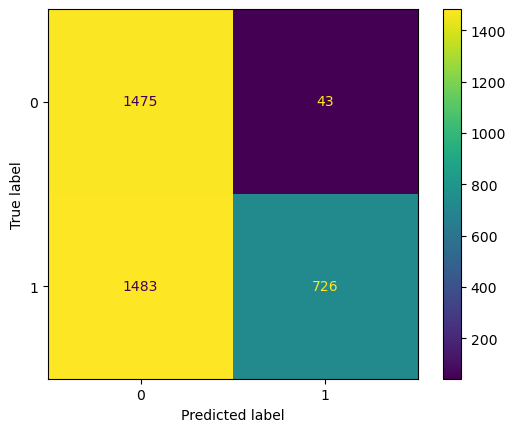

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gnb)).plot()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)

<Figure size 800x600 with 0 Axes>

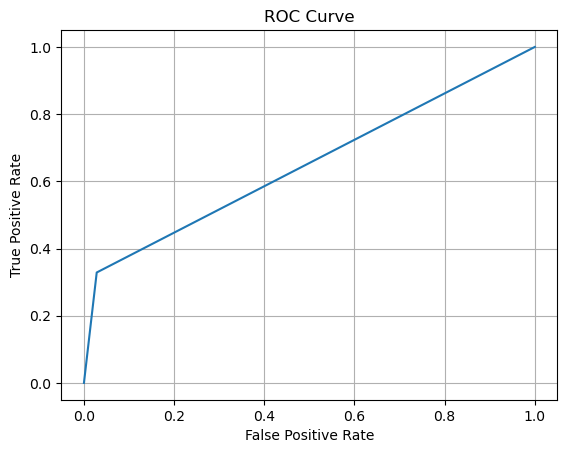

In [ ]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
mn=MultinomialNB()

In [ ]:
mn.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred_mn=mn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_mn)*100

83.7939361416689

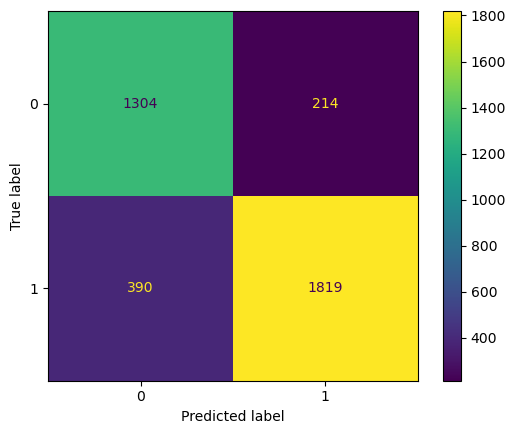

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_mn)).plot()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mn)

<Figure size 800x600 with 0 Axes>

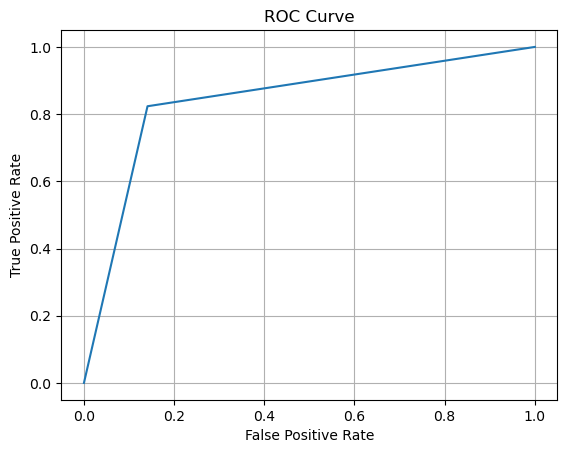

In [ ]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'alpha': np.linspace(0.1, 2.0, 20),  # Vary alpha from 0.1 to 2.0
}

In [ ]:
# Perform grid search with cross-validation (5-fold in this example)
gs_mn= GridSearchCV(estimator=mn, param_grid=param_grid, cv=5)
gs_mn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])})

In [ ]:
# Get the best hyperparameters from grid search
best_alpha = gs_mn.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the model with the best hyperparameters
best_nb_model = MultinomialNB(alpha=best_alpha)
best_nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_nb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy on test set: {accuracy:.4f}")

Best alpha: 0.2
Accuracy on test set: 83.7939


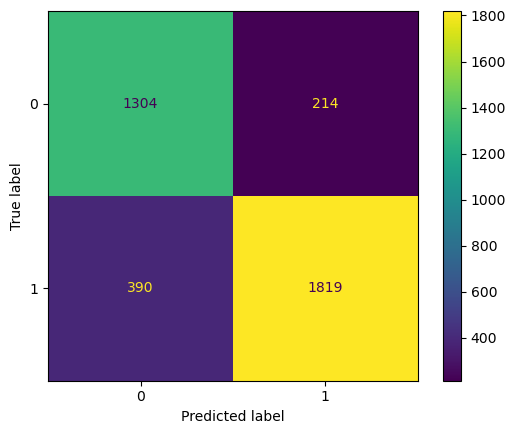

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [ ]:
bn=BernoulliNB()

In [ ]:
bn.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_pred_bn=bn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_bn)*100

84.00858599409713

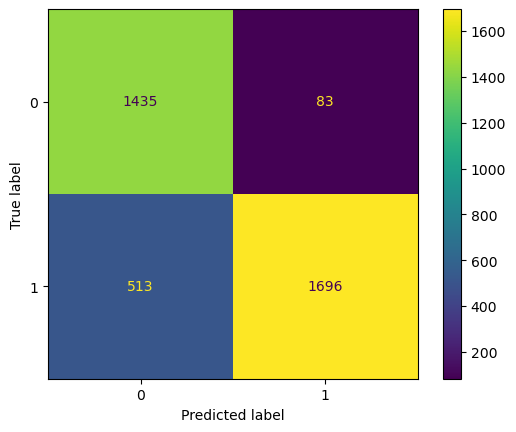

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bn)).plot()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bn)

<Figure size 800x600 with 0 Axes>

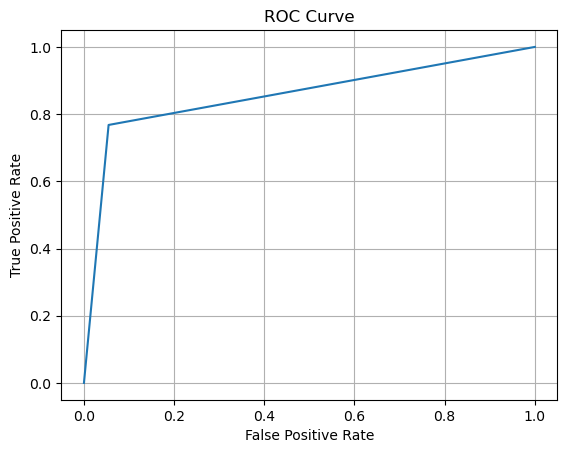

In [ ]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
s=cv.transform(['job doctyp html public w c dtd html transit en htmlhead meta http equiv content type content text html charset iso meta content mshtml name gener style style head bodi bgcolor ffffff div font face arial size strongimg style width px height px alt align right vspace border dear sir madam strong div div divstrong strong div divstrongi found address internet interest job vacanc strong div divstrongi person web site view document br strong div diva href http www jobtran info employ index php menu viewsingl sajat emailrol id strongcv passport work refer diploma medic certif cours drive licens polic record foto album strong abr div divstronga href http www jobtran info employ index php menu viewsingl sajat emailrol id http www jobtran info employ index php menu viewsingl sajat emailrol id strong div div div divstrongthes printabl download strong div divstrong strong div divstrongi hope hear near futur strong div divstrongthank kind attent strong div divstrongyour sincer strong div divstrong strong div divstrong divfont face arial size stefan veronica font strong font div div div diva href mailto stefanveronica jobtran infofont face arial size stefanveronica jobtran info font div divfont face arial size font div divfont face arial size font div divfont face arial size font div divfont face arial size font div divfont face arial size strong strong font div divfont face arial size strongjobtran info nli websit world system automat repli cv document everi incom letter letter identifi job offer br jobtran info provid candid job post go convinc br write opinion guestbook brbrif want receiv letter jobtran candid pleas inform offic reason send href http cablel ms fx ro unsusbscrib php target blankhttp cablel ms fx ro unsusbscrib php strong font div bodi html'])

In [ ]:
s.shape

(1, 500)

In [ ]:
s=s.toarray()

In [ ]:
s = s.reshape(1, -1)
s = np.squeeze(s)

In [ ]:
# Now you can make predictions using the BernoulliNB model
predictions = bn.predict([s])
print(predictions)

[0]


In [ ]:
df.iloc[21]

Email Text    formal invit chase secret reveal porn star per...
Email Type                                       Phishing Email
Name: 21, dtype: object

In [ ]:
s2=df['Email Text'].iloc[21]

In [ ]:
 s2=cv.transform([s2])

In [ ]:
s2.shape

(1, 500)

In [ ]:
s2=s2.toarray()

In [ ]:
s2=s2.reshape(1,-1)
s2=np.squeeze(s2)

In [ ]:
bn.predict([s2])

array([0])

In [ ]:
##implementing the ANN for this
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers , losses
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import LearningRateScheduler

In [ ]:
# Create a simple sequential model
model = Sequential()

model.add(layers.Dense(128, input_shape=(500,), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

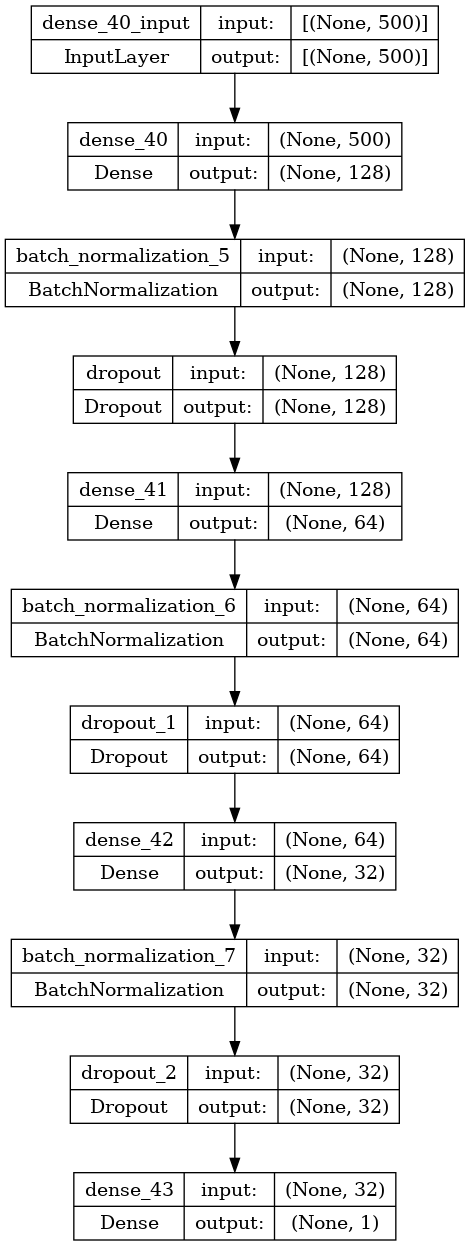

In [ ]:
# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/50
466/466 [==============================] - 7s 7ms/step - loss: 0.3921 - accuracy: 0.8183 - val_loss: 0.4139 - val_accuracy: 0.7663
Epoch 2/50
466/466 [==============================] - 3s 7ms/step - loss: 0.2164 - accuracy: 0.9102 - val_loss: 0.3068 - val_accuracy: 0.8532
Epoch 3/50
466/466 [==============================] - 3s 7ms/step - loss: 0.1738 - accuracy: 0.9303 - val_loss: 0.2723 - val_accuracy: 0.8771
Epoch 4/50
466/466 [==============================] - 3s 7ms/step - loss: 0.1536 - accuracy: 0.9398 - val_loss: 0.2455 - val_accuracy: 0.8962
Epoch 5/50
466/466 [==============================] - 3s 7ms/step - loss: 0.1468 - accuracy: 0.9414 - val_loss: 0.2090 - val_accuracy: 0.9109
Epoch 6/50
466/466 [==============================] - 3s 7ms/step - loss: 0.1323 - accuracy: 0.9473 - val_loss: 0.2200 - val_accuracy: 0.9047
Epoch 7/50
466/466 [==============================] - 3s 7ms/step - loss: 0.1220 - accuracy: 0.9519 - val_loss: 0.1899 - val_accuracy: 0.9206
Epoch 

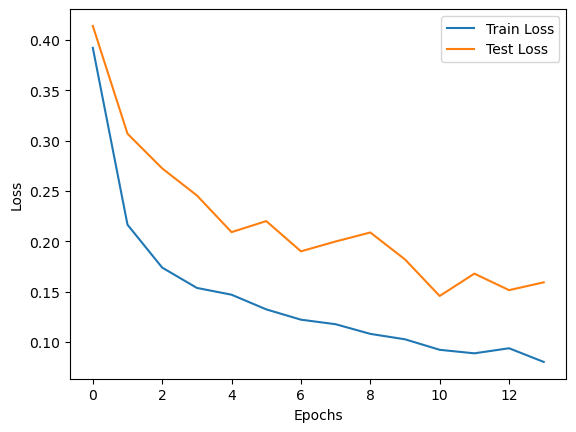

In [ ]:
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'],label="Test Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

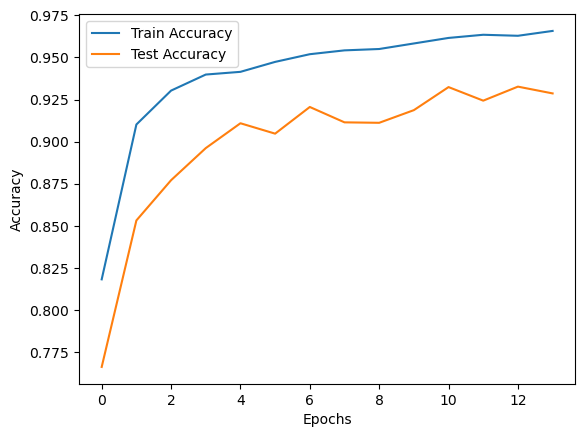

In [ ]:
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
y_pred_ann=model.predict(X_test)

117/117 [==============================] - 0s 2ms/step


In [ ]:
results=model.evaluate(X_test,y_test)

117/117 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9286


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.15912410616874695, 0.9286289215087891]


In [ ]:
results=model.evaluate(X_train,y_train)

466/466 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9700


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.07858016341924667, 0.9700140953063965]


In [ ]:
s2=df['Email Text'].iloc[1298]

s2=cv.transform([s2])

s2_reshaped = s2.reshape(1, -1)
s2_dense = s2.toarray()



result=model.predict([s2])
if result < 0.5:
    print(np.floor(result))
else:
    print(np.ceil(result))

1/1 [==============================] - 0s 10ms/step
[[1.]]


In [ ]:
df.iloc[1298]

Email Text    translat john benjamin publish would like call...
Email Type                                           Safe Email
Name: 1300, dtype: object